# 向量和最简单的神经网络

## 向量

向量(Vector)是深度学习，GenAI领域的基础元素。 

其实向量可以简单地理解为数组,一维向量就是只有一个元素的数组，二维向量就是有两个元素的数组，三维向量是有三个元素的数组...

学术文章里面严谨一点的数学表达如下，这是一个n维向量，相当于是有n个元素的数组


\begin{align}
\vec{x} = \begin{bmatrix}
x_1 \\
x_2 \\
. \\
. \\
. \\
x_n
\end{bmatrix}
\end{align}


有时候为了排版方便还会用下面这种形式, 其中x右上角的字母T表示“转置”的意思，就是把向量换个了方向，在现在这个具体的例子里就是把从上到下的顺序换成从左到右:

\begin{align*}
x^T = \begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}
\end{align*}



这里面关于维度这个词的使用很容易导致一些混淆，一般在程序员心里都会对一维数组，二维数组，三维数组有很深的印象，很容易把数组的维度和向量的维度混淆起来。

因为维度这个词广泛的适用性，在深度学习的很多地方都会使用到这个词，表达的意思还往往是不同的，所以我们在初步接触这个维度这个词的时候需要仔细思考一下。

如果有一个一维数组，数组长度是5，就是里面有5个元素，那么这个数组的维度是1， 这个数组对应的向量的维度是5.

再比如，有一个二维数组，形状是 [4 * 6]的，也就是说有4行，6列的数组，那么这个数组自己的维度是 2， 而向量的维度是 4 * 6 = 24 维。

其实，一个 [4 * 6]的二维数组也可以当作是一个 24个元素的一维数组来看，里面向量的维度还是 24 维。

简单讲，向量的维度由数组内的元素个数决定。

用一个不是特别准确的方式，我们可以把数组的维度对应到深度学习的一些概念里，一维数组对应的概念是向量，二维数组对应的概念是矩阵，三维数组对应的概念是张量，就是我们常说的tensor, 更多维度的数组就对应高维张量了，不再给特殊的名词。

因为深度学习中经常把一组向量组合起来同时使用，所以后面会经常看到张量，也就是tensor，的使用。

为了更形象具体的展示向量，人们经常把向量画在坐标轴上，下面是坐标轴上展示的二维向量和三维向量。因为我们生活在三维空间里，所以我们对三维以内的向量还是容易理解和想象。

但是更高维度的向量可以具象成什么样子人类是很难想象的。
所以我们在理解高维度向量的时候可以跳出想象的限制，直接从概念入手，100维的向量就是100个元素的数组。从这个角度理解的话，以后要理解无限维度向量这样的概念就会比较简单。


<div style="display:flex; justify-content:space-between; max-width:700px;">
  <img src="../images/001_axis_and_vector.png" alt="二维向量" style="max-width:48%;max-height:300px;background-color:#333333;">
  <img src="../images/001_axis_and_3dvector.png" alt="三维向量" style="max-width:48%;max-height:300px;background-color:#333333;">
</div>






## 人造的神经元

现在的深度学习技术是受人类大脑的神经元结构的启发而来的。虽然大家都知道深度学习的工作方式和人类大脑是不一样的，在很长一段时间内大家都接受这个事实，觉得不需要做得和人脑一样强。我们让深度学习可以完成一些比以前复杂的任务就行，不需要比人类强。
直到有一天大语言模型（LLM）出现，大家才发现，说不定现在深度学习的方法比人脑的方法更好。

深度学习里面的最基本结构是一个 人造神经元 ， 或者用学术名词叫 “感知器”，英文是Perceptron。
著名的人工智能科学家 马文.明斯基 （Marvin Minsky）就曾经以 “Perceptron” 为书名写过一本专门分析“感知器”的书，书中还讨论了“感知器”的限制，就是单个“感知器”不能解决“异或问题”，甚至有人认为是这本书导致了人工智能第一次寒冬。
关于“异或问题”我们后面再讨论，现在先看看一个 人造神经元 是什么样的。

人造神经元的基本思路就是拿到一堆输入值，需要计算出来一个合适的输出值，一堆输入值对应的就是神经元的树突，一个输出值就对应神经元的轴突，计算逻辑对应神经元主体。

一堆输入值的存储就用到了上面讨论的第一个基础概念：向量。如果有n个输入值，我们就用n维向量来存储和表达，输出值只有一个，可以用一个标量来表示，或者用一个只有一个元素的一维向量来存储。

于是有了以下的关系：

\begin{align*}
 \begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}   ？=    y_1 
\end{align*}

我们要做的就是找到一个合适的方式形成这种关系。一个合理而简单的方式就是给每一个$x_i$ 配一个权重 $w_i$，然后把所有$x_i * w_i$ 加起来当作是$y_1$。


\begin{align*}
  x_1*w_1  + x_2*w_2 + x_3*w_3 + ... + x_n*w_n = y_1
\end{align*}


用严谨一点的数学表示是这样：



\begin{align}

\begin{bmatrix} w_1 & w_2 & \cdots & w_n \end{bmatrix}   . 
 \begin{bmatrix}
x_1 \\
x_2 \\
. \\
. \\
. \\
x_n
\end{bmatrix}

 =    y_1 

\end{align}


两个向量 w 和 x之间的 . 符号是点乘的意思，简单理解就是把两个向量对应位置的元素拿出来相乘，然后把乘积都加起来。
就是上面的$x_1*w_1  + x_2*w_2 + x_3*w_3 + ... + x_n*w_n$

还有很多地方会用Σ符号来表示：

 $$\sum_{i=1}^{n} x_i w_i$$
 
 甚至偷懒写成下面这样：
 
 
$$\sum  w_n  x_n$$

如果直接用向量符号就是这样：

\begin{align}
\vec{w}^T  \cdot \vec{x} 
\end{align}

或者再简化一点，直接用大写字母，不要头上的向量符号：


\begin{align}
W^T  \cdot X 
\end{align}




用常见的神经网络示意图就是如下这个图的样子，以n=4为例：


<div style="align-items: center;">
        <img src="../images/001_neuron.png" alt="人造神经元" style="max-height:400px;background-color:#333333;">
        </div>


这里还有一个细节需要注意，一般的线性映射函数都会有一个叫偏置项的输入，常用字母$b$表示 
表达成这样，这里面所谓的偏置项就是我们常说的常数项，就是和输入x无关的一个项：

\begin{align}
W^T  \cdot X  + b
\end{align}

我们以前学习基本的数字知识的时候用的一次函数里也会提这个常数项，比如：

\begin{align}
y = ax + b
\end{align}

这里的$a$是一次项，$b$是常数项，这里的$b$和上面的$b$表达的是同一个意思。

在实际实现中，为了方便，经常的做法就是加一个$x_0$，让它等于1， 那这样$w_0$就相当于$b$了

图示如下：


<div style="align-items: center;">
        <img src="../images/001_neuron_with_b.png" alt="人造神经元" style="max-height:400px;background-color:#333333;">
        </div>





## 最简单的神经网络

\begin{align}
\end{align}




## 最简单的神经网络

### 1. 单层神经网络

单层神经网络由多个人造神经元组成。每个人造神经元接收输入向量 X，并通过权重向量 W 和偏置项 b 进行加权求和运算,最后通过激活函数 f 得到输出。数学表达式如下:

\begin{align}

y = f(W^T \cdot X + b)

\end{align}

其中:
- X 是输入向量,维度为 n-1 （使用n-1是为了给偏置项b留一个维度，后面把偏置项算上就是n维）
- W 是权重向量,维度为 n-1 （使用n-1是为了给偏置项b留一个维度，后面把偏置项算上就是n维）
- b 是偏置项,是一个标量
- f 是激活函数,如 sigmoid、ReLU 等

我们现在还没有讨论为什么要有激活函数，所以可以先从简化的角度把激活函数去掉。

然后上文讨论过，偏置项b可以通过设计恒为1的$x_0$直接放进$W$中

于是有了这样的表达：

\begin{align}

y = W^T \cdot X 

\end{align}

其中:
- X 是输入向量,维度为 n
- W 是权重向量,维度为 n



将多个人造神经元组合在一起,就形成了单层神经网络。假设有 m 个神经元,输出向量 Y 的维度为 m,则单层神经网络可表示为:

\begin{align}

Y = W^T \cdot X

\end{align}

其中:
- X 是输入向量,维度为 n
- W 是权重矩阵,维度为 m × n

形成的单层神经网络可以用以下示意图表达：


<div style="align-items: center;">
    <img src="../images/001_network_single_layer.png" alt="单层神经网络" style="max-height:300px;background-color:#333333;">
</div>


如果要强调有偏置项$B$，也可以加上$x_0$和$w_0$，表达成这样：

以后的讨论中我们就不再强调这一点，有没有偏置项只是处理的一个细节。

<div style="align-items: center;">
    <img src="../images/001_network_single_layer_with_b.png" alt="单层神经网络" style="max-height:300px;background-color:#333333;">
</div>



### 2. 多层神经网络

多层神经网络由多个单层神经网络组成,每一层的输出作为下一层的输入。假设有 L 层,第 l 层的输出 Y^(l) 可表示为:

\begin{align}

Y^{(l)} = f^{(l)}(W^{(l)T} \cdot Y^{(l-1)} + B^{(l)})

\end{align}


其中:
- Y^(l-1) 是第 l-1 层的输出,也是第 l 层的输入
- W^(l) 是第 l 层的权重矩阵
- B^(l) 是第 l 层的偏置向量
- f^(l) 是第 l 层的激活函数

同样，简化一下，先不考虑偏置项和激活函数，可以表示为：

假设有 L 层,第 l 层的输出 Y^(l) 可表示为:

\begin{align}

Y^{(l)} = W^{(l)T} \cdot Y^{(l-1)} 

\end{align}


其中:
- Y^(l-1) 是第 l-1 层的输出,也是第 l 层的输入
- W^(l) 是第 l 层的权重矩阵






对于整个多层神经网络,输入为 X,输出为 Y^(L),中间层的计算过程为:

\begin{align}

Y^{(1)} &= W^{(1)T} \cdot X \\
Y^{(2)} &= W^{(2)T} \cdot Y^{(1)} \\
&\vdots \\
Y^{(L)} &= W^{(L)T} \cdot Y^{(L-1)} 

\end{align}


其中，$Y^{(1)}$ 到 $Y^{(L)}$ 都是向量，而且他们的维度可以不同。

一下的图示展示了一个2层的神经网络，第一层有3个神经元，第二层有5个神经元。

<div style="align-items: center;">
    <img src="../images/001_network.png" alt="多层神经网络" style="max-height:300px;background-color:#333333;">
</div>

通过添加更多隐藏层和神经元,多层神经网络可以拟合更加复杂的函数,从而解决更加困难的问题。

另外有一个非常重要的事情，我们现在还没有讨论权重$W$和偏置量$B$如何才能正确设置,这点我们在下一个大章节关于神经网络的训练的时候详细展开。

在讨论神经网络的训练过程之前，我们先假定我们已经可以学习到一组合适的权重$W$和偏置量$B$并设置到神经网络中。








## 为什么需要激活函数（线性坍塌带来的问题）

在没有激活函数的情况下，多层神经网络会退化成单层神经网络，这种现象被称为线性坍塌。我们以一个两层神经网络为例来说明这个问题。

这个神经网络的示意图如下：


<div style="align-items: center;">
    <img src="../images/001_linear_collapse.png" alt="线性坍塌" style="max-height:300px;background-color:#333333;">
</div>






假设第一层有两个输入 x1 和 x2，通过两个加权求和运算得到 h1 和 h2:

\begin{align}
h_1 = ax_1 + bx_2 + c
\end{align}

\begin{align}
h_2 = ex_1 + fx_2 + g
\end{align}

其中 $a,b,e,f$ 表示第一层的权重矩阵元素，$c,g$ 表示第一层的偏置向量元素。

然后，h1 和 h2 通过另一个加权求和运算得到输出 y:

\begin{align}
y = uh_1 + vh_2 + z
\end{align}

其中 $u, v$ 表示第二层的权重向量元素，$z$ 表示第二层的偏置项。

将上面的公式代入 y 的表达式中，我们可以得到:

\begin{align}
\begin{aligned}
y &= u(ax_1 + bx_2 + c) + v(ex_1 + fx_2 + g) + z \\
y &= (ua + ve)x_1 + (ub + vf)x_2 + uc + vg + z \\
y &= w_1x_1 + w_2x_2 + b

\end{aligned}
\end{align}

可以看到，上面的表达式实际上等价于一个单层神经网络:


其中:

\begin{align}
w_1 = ua + ve
\end{align}

\begin{align}
w_2 = ub + vf
\end{align}

\begin{align}
b = uc + vg + z
\end{align}

因此，在没有激活函数的情况下，多层神经网络会退化成单层神经网络，失去了多层网络的表达能力。这就是线性坍塌的问题。引入非线性激活函数可以很好地解决这个问题，使得多层神经网络具有更强的表达能力。

下面是Python代码,使用NumPy和Matplotlib来演示两个线性函数相加的结果仍然是一个线性函数:


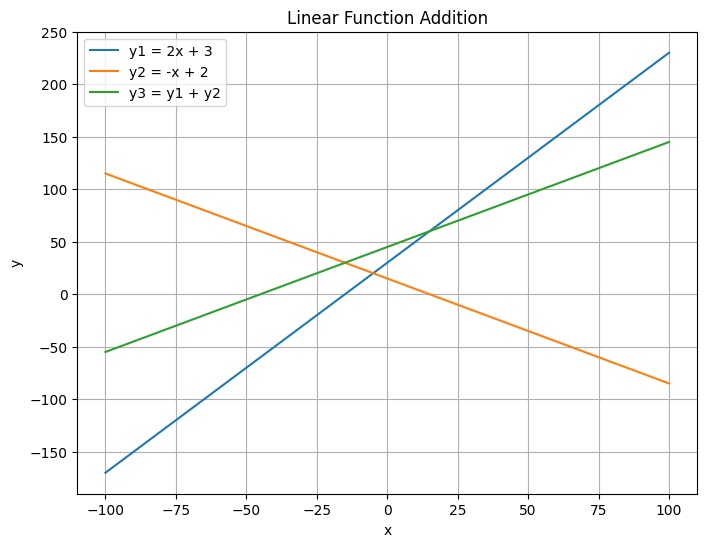

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# 定义线性函数参数
a, b = 2, 30
d, e = -1, 15

# 生成 x 的样本
x = np.linspace(-100, 100, 100)

# 计算 y1, y2, y3
y1 = a * x + b
y2 = d * x + e
y3 = y1 + y2

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='y1 = 2x + 3')
plt.plot(x, y2, label='y2 = -x + 2')
plt.plot(x, y3, label='y3 = y1 + y2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Function Addition')
plt.grid(True)
plt.show()




在上面的代码中,我们首先定义了两个线性函数的参数 a, b 和 d, e。然后,我们使用 `np.linspace` 函数生成了一个从 -100 到 100 的等间隔样本 x,包含 100 个点。

接下来,我们计算了两个线性函数 y1 和 y2 的值,以及它们的和 y3。具体来说:

\begin{align}

y_1 = ax + b = 2x + 30

\end{align}

\begin{align}
y_2 = dx + e = -x + 15
\end{align}

\begin{align}
y_3 = y_1 + y_2 = (a + d)x + (b + e) = x + 45
\end{align}
可以看到,y3 的表达式仍然是一个线性函数,其中系数为 a + d = 1,常数项为 b + e = 45。

最后,我们使用 Matplotlib 库绘制了三条线性函数在给定 x 范围内的曲线,并添加了图例、坐标轴标签和标题。

运行上述代码后,我们可以在绘制的图形中清晰地看到,y3 的曲线就是 y1 和 y2 曲线的点wise相加的结果,并且 y3 本身也是一条直线,证明了两个线性函数相加的结果仍然是一个线性函数。

## 激活函数介绍

激活函数是神经网络中非常重要的一个组成部分,它引入了非线性,使得神经网络能够拟合更加复杂的函数。下面我们介绍几种常用的激活函数。

### Sigmoid 函数

Sigmoid 函数的数学表达式为:

\begin{align}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{align}

它将输入值映射到了 (0, 1) 范围内,具有平滑且可导的性质。然而,Sigmoid 函数在正负较大的输入值时,导数接近于 0,这会导致梯度消失的问题,从而使得神经网络在训练过程中收敛缓慢。

### Tanh 函数

Tanh 函数的数学表达式为:

\begin{align}
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{align}

它将输入值映射到了 (-1, 1) 范围内,相比于 Sigmoid 函数,它是一种零均值的函数,收敛速度更快。但是,它也存在梯度消失的问题。

### ReLU 函数

ReLU (Rectified Linear Unit) 函数的数学表达式为:

\begin{align}
\text{ReLU}(x) = \max(0, x)
\end{align}

它是一种分段线性函数,在正半轴上是线性的,在负半轴上是 0。ReLU 函数的优点包括:

1. 计算简单,只需判断输入是否大于 0
2. 不存在梯度消失问题,当 x > 0 时,导数为 1
3. 提供了稀疏表达,使得网络更加高效

然而,ReLU 函数也存在一些问题:

1. 死亡神经元问题:当输入为负值时,导数为 0,神经元将永远不会被激活
2. 非平滑,在 x = 0 处不可导

针对这些问题,研究者提出了一些变体,如 Leaky ReLU、PReLU 等,它们在负半轴上保留了一个较小的非零斜率,从而缓解了死亡神经元问题,同时也使得函数在 x = 0 处可导。

此外,还有一些其他的激活函数,如 Maxout、ELU 等,它们各有特点,在不同的场景下表现不同。选择合适的激活函数对于神经网络的性能至关重要。

以下是对上文线性坍塌演示代码的修改，加入了ReLU激活函数，展示激活函数的效果：

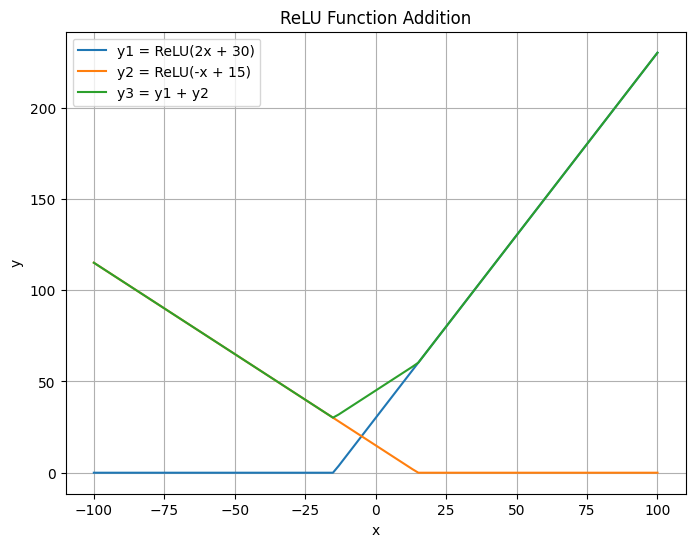

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义线性函数参数
a, b = 2, 30
d, e = -1, 15

# 生成 x 的样本
x = np.linspace(-100, 100, 100)

# 计算 y1, y2, y3， 这里用 np 函数库里的 maximum 函数实现 ReLU 函数
y1 = np.maximum(0, a * x + b)
y2 = np.maximum(0, d * x + e)
y3 = y1 + y2

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='y1 = ReLU(2x + 30)')
plt.plot(x, y2, label='y2 = ReLU(-x + 15)')
plt.plot(x, y3, label='y3 = y1 + y2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU Function Addition')
plt.grid(True)
plt.show()




在修改后的代码中,我们使用了 NumPy 中的 `np.maximum` 函数来实现 ReLU 激活函数。具体来说:

\begin{align}
y_1 = \text{ReLU}(ax + b) = \max(0, 2x + 30)
\end{align}

\begin{align}
y_2 = \text{ReLU}(dx + e) = \max(0, -x + 15)
\end{align}

\begin{align}
y_3 = y_1 + y_2
\end{align}

由于 ReLU 函数引入了非线性,因此 y3 的表达式不再是一个线性函数。相反,它是两个分段线性函数的叠加。

在绘制图形时,我们将 y1 和 y2 的标签分别更新为 `'y1 = ReLU(2x + 30)'` 和 `'y2 = ReLU(-x + 15)'`,以反映它们现在是 ReLU 激活函数的输出。同时,图形标题也更新为 `'ReLU Function Addition'`。

运行修改后的代码,我们可以看到,y3 的曲线不再是一条直线,而是由多个线段组成的分段线性函数。这说明,当线性函数经过非线性激活函数的变换后,它们相加的结果不再是线性函数。

通过这个例子,我们可以直观地看到,非线性激活函数在神经网络中的重要作用。它使得神经网络能够拟合更加复杂的函数,从而提高了模型的表达能力。